# Convolution of the flux and interaction cross-section

Miscellaneous:

In [77]:
import sys

sys.path.append("../../..")

import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
from matplotlib import rc
import mpl_toolkits.axes_grid1.inset_locator as inloc
import scipy.stats as stats
import src.energy_effects_t2k.convolution as conv
import src.nu_osc.osc_prob as osc
import src.nu_osc.default_parameters as param

<p> </p>
To make plots more beautiful

In [78]:
rc("figure", figsize=(10, 5))
# rc('lines', linewidth=2)
rc("axes", labelsize=12, linewidth=1, grid=True, labelpad=-1, axisbelow=True)
rc("axes.spines", right=True)
rc("xtick", direction="in", labelsize=12, top=True)
rc("xtick.major", width=0.8, size=5)
rc("ytick", direction="in", labelsize=12, right=True)
rc("ytick.major", width=0.8, size=5)
rc("legend", fancybox=False, fontsize=12, shadow=False)
rc(
    "grid",
    linewidth=1.0,
)  # ls='dotted')
# import matplotlib_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

## Inferred fluxes at SK from ND280

<p> </p>
Defining a $\texttt{pandas dataframe}$:

In [79]:
t2kflux_2020_plus250kA_nominal_sk = conv.fluximport(
    "t2kflux_2020_plus250kA_nominal_sk.csv"
)
t2kflux_2020_plus250kA_runcond_sk = conv.fluximport(
    "t2kflux_2020_plus250kA_runcond_sk.csv"
)
t2kflux_2020_plus250kA_runcond_sk.head()

,Bin #,minE,maxE,numu,antinumu,nue,antinue,truenumu,truenue,trueantinumu,trueantinue,total,truetotal,nutau,antinutau
0,1,0.00,0.01,846.0,869.0,9.31,2.29,1.692000e-19,1.862000e-21,1.738000e-19,4.580000e-22,1726.6,3.453200e-19,0,0
1,2,0.01,0.02,5030.0,5770.0,56.70,11.20,1.006000e-18,1.134000e-20,1.154000e-18,2.240000e-21,10867.9,2.173580e-18,0,0
2,3,0.02,0.03,11200.0,13900.0,139.00,25.80,2.240000e-18,2.780000e-20,2.780000e-18,5.160000e-21,25264.8,5.052960e-18,0,0
3,4,0.03,0.04,18500.0,24100.0,261.00,42.50,3.700000e-18,5.220000e-20,4.820000e-18,8.500000e-21,42903.5,8.580700e-18,0,0
4,5,0.04,0.05,26100.0,35300.0,407.00,61.50,5.220000e-18,8.140000e-20,7.060000e-18,1.230000e-20,61868.5,1.237370e-17,0,0


In [80]:
t2kflux_2020_plus250kA_nominal_sk.describe()

,minE,maxE,numu,antinumu,nue,antinue,truenumu,truenue,trueantinumu,trueantinue,total,truetotal,nutau,antinutau
count,138.000000,138.000000,1.380000e+02,138.000000,138.000000,138.000000,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,138.0,138.0
mean,3.777174,3.994565,3.667457e+05,19051.943014,2801.880065,299.137313,8.748433e-17,1.038868e-18,5.886269e-18,1.617833e-19,3.888987e+05,9.457125e-17,0.0,0.0
std,7.011859,7.350760,4.188749e+05,14349.800825,2179.844692,201.454071,7.878845e-17,8.485272e-19,4.123908e-18,1.905671e-19,4.287134e+05,8.014151e-17,0.0,0.0
min,0.000000,0.010000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
25%,0.342500,0.352500,1.030000e+04,2105.000000,427.750000,86.325000,2.080000e-17,3.810000e-19,4.625000e-18,4.535000e-20,1.291775e+04,2.858045e-17,0.0,0.0
50%,0.685000,0.695000,1.580000e+05,25450.000000,3105.000000,358.500000,6.625000e-17,9.990000e-19,5.720000e-18,9.870000e-20,1.910360e+05,7.626000e-17,0.0,0.0
75%,2.375000,2.550000,6.715000e+05,28900.000000,4997.500000,490.750000,1.442000e-16,1.132000e-18,6.715000e-18,1.618500e-19,7.035265e+05,1.528307e-16,0.0,0.0
max,29.000000,30.000000,1.210000e+06,55700.000000,5660.000000,531.000000,2.420000e-16,3.820000e-18,2.220000e-17,7.660000e-19,1.244752e+06,2.489504e-16,0.0,0.0


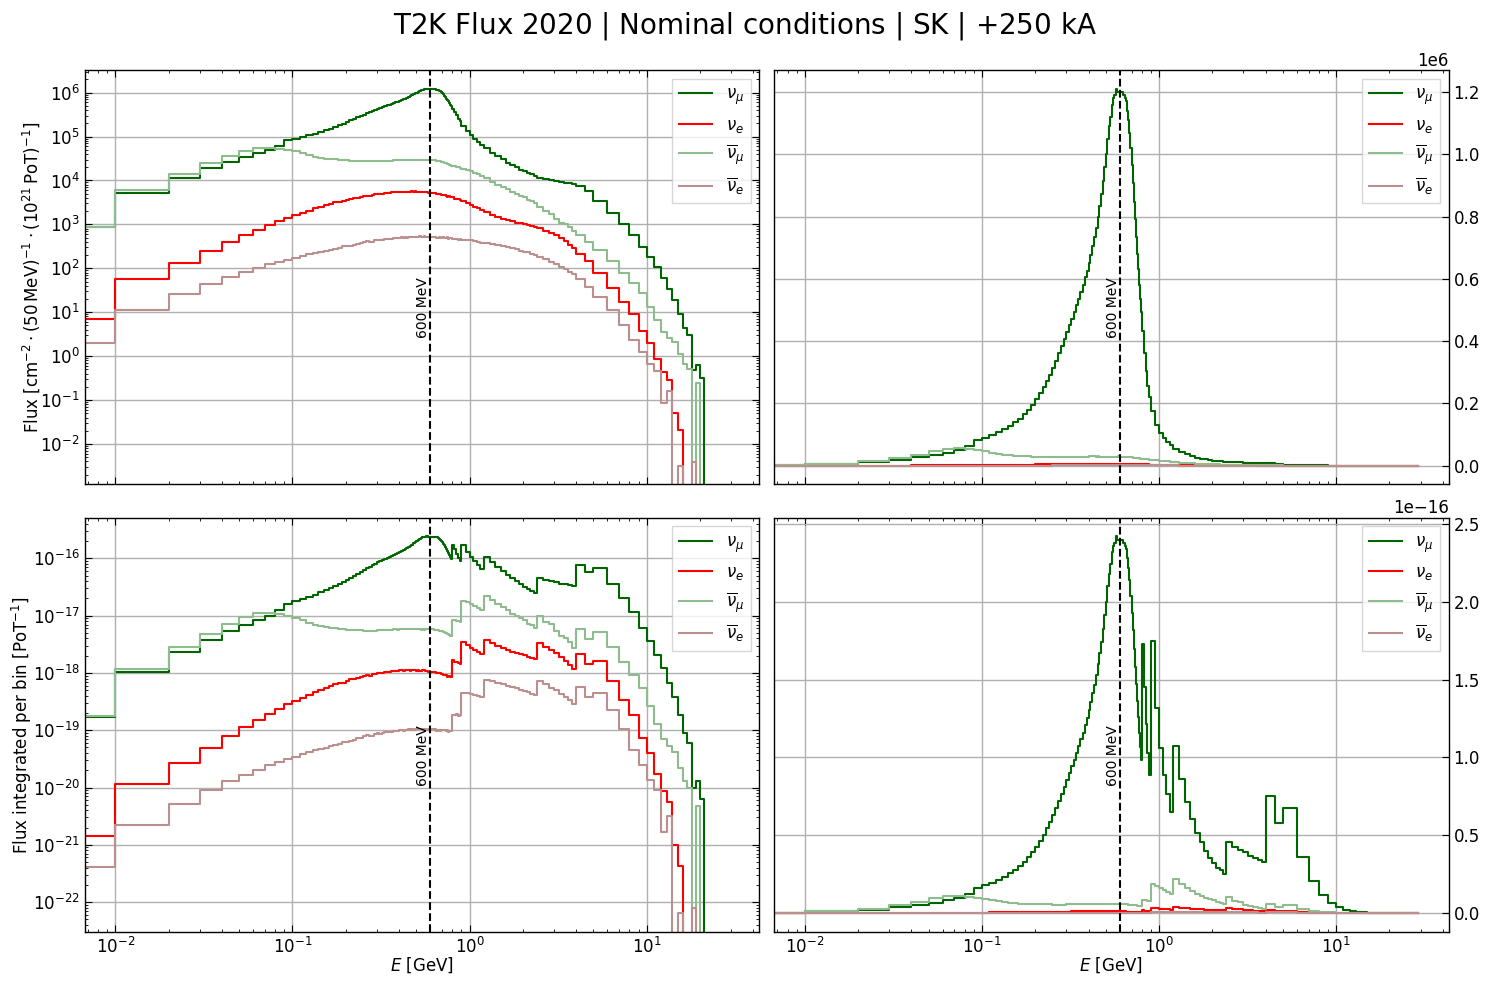

In [81]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex="col")

colors = {
    "numu": "darkgreen",
    "antinumu": "darkseagreen",
    "nue": "red",
    "antinue": "rosybrown",
    "nutau": "teal",
    "antinutau": "cadetblue",
}

for key in ["numu", "nue", "antinumu", "antinue"]:
    for i in [0, 1]:
        axs[0, i].step(
            t2kflux_2020_plus250kA_nominal_sk.minE,
            t2kflux_2020_plus250kA_nominal_sk[key],
            label=conv.print_dict[key],
            color=colors[key],
            where="post",
        )
        axs[1, i].step(
            t2kflux_2020_plus250kA_nominal_sk.minE,
            t2kflux_2020_plus250kA_nominal_sk["true" + key],
            label=conv.print_dict[key],
            color=colors[key],
            where="post",
        )

for ax in axs.reshape(-1):
    ax.set_xscale("log")
    ax.legend()
    ax.text(
        x=0.6,
        y=0.5,
        s=r"600 MeV",
        ha="right",
        va="top",
        rotation=90,
        transform=ax.get_xaxis_transform(),
    )
    ax.axvline(x=0.6, linestyle="--", color="black")

for i in [0, 1]:
    axs[i, 0].set_yscale("log")
    # axs[i,0].set_ylim(bottom=1e-1)
    axs[i, 1].yaxis.tick_right()
    axs[1, i].set_xlabel(r"$E$ [GeV]")

axs[0, 0].set_ylabel(
    r"Flux [$\text{cm}^{-2}\cdot (50\,\text{MeV})^{-1} \cdot (10^{21}\,\text{PoT})^{-1}$]"
)
axs[1, 0].set_ylabel(r"Flux integrated per bin [$\text{PoT}^{-1}$]")

fig.suptitle(r"T2K Flux 2020 | Nominal conditions | SK | $+250$ kA", fontsize=20)
fig.tight_layout()
plt.show()

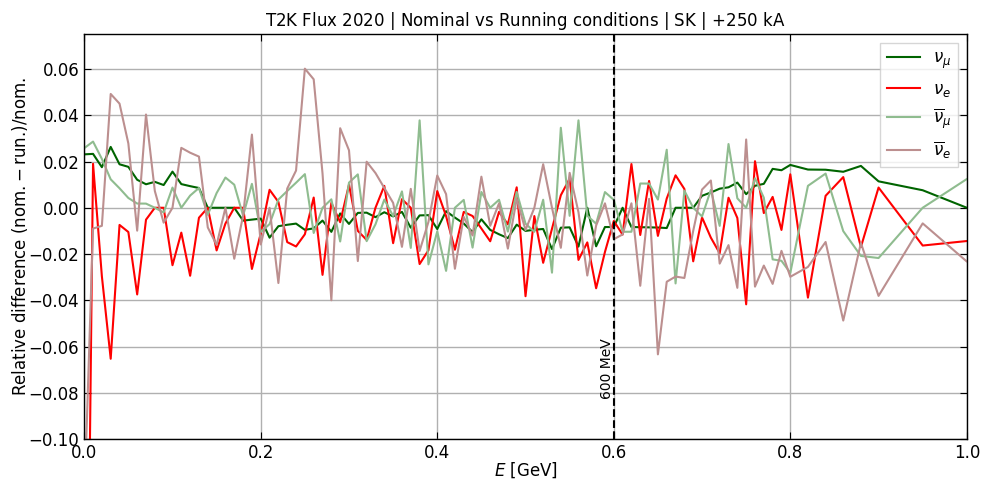

In [82]:
for key in ["numu", "nue", "antinumu", "antinue"]:
    plt.plot(
        t2kflux_2020_plus250kA_nominal_sk.minE,
        (
            t2kflux_2020_plus250kA_nominal_sk[key]
            - t2kflux_2020_plus250kA_runcond_sk[key]
        )
        / t2kflux_2020_plus250kA_nominal_sk[key],
        label=conv.print_dict[key],
        color=colors[key],
    )

ax = plt.gca()
plt.legend()
plt.axvline(x=0.6, linestyle="--", color="black")
plt.text(
    x=0.6,
    y=0.25,
    s=r"600 MeV",
    ha="right",
    va="top",
    rotation=90,
    transform=ax.get_xaxis_transform(),
)
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"Relative difference $(\text{nom.}-\text{run.})/\text{nom.}$")
plt.xlim(0, 1)
plt.ylim(bottom=-0.1, top=0.075)


plt.title(r"T2K Flux 2020 | Nominal vs Running conditions | SK | $+250$ kA")
plt.tight_layout()
plt.show()

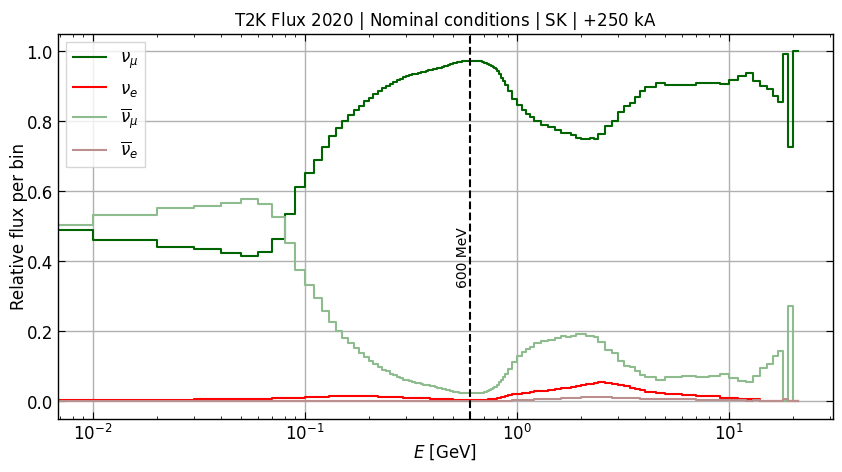

In [83]:
# rc("figure", figsize=(10, 6))

for key in ["numu", "nue", "antinumu", "antinue"]:
    plt.step(
        t2kflux_2020_plus250kA_nominal_sk.minE,
        t2kflux_2020_plus250kA_nominal_sk[key]
        / t2kflux_2020_plus250kA_nominal_sk.total,
        label=conv.print_dict[key],
        color=colors[key],
        where="post",
    )

plt.axvline(x=0.6, linestyle="--", color="black")
ax = plt.gca()
plt.text(
    x=0.6,
    y=0.5,
    s=r"600 MeV",
    ha="right",
    va="top",
    rotation=90,
    transform=ax.get_xaxis_transform(),
)

plt.xscale("log")
# plt.yscale('log')
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"Relative flux per bin")
# plt.ylim(bottom=1e-4)
plt.title(r"T2K Flux 2020 | Nominal conditions | SK | $+250$ kA")
plt.legend()

plt.show()

In [36]:
summed_integral = t2kflux_2020_plus250kA_nominal_sk.truetotal.sum()
integrals = {
    key: [t2kflux_2020_plus250kA_nominal_sk["true" + key].sum()]
    for key in ["numu", "nue", "antinumu", "antinue"]
}
for key in ["numu", "nue", "antinumu", "antinue"]:
    integrals[key].append(integrals[key][0] / summed_integral)
pd.DataFrame(integrals, index=["abs", "relat"])

,numu,nue,antinumu,antinue
abs,1.207284e-14,1.433637e-16,8.123051e-16,2.232609e-17
relat,9.250626e-01,1.098503e-02,6.224163e-02,1.710702e-03


<p> </p>

So that the integrated flux at SK (2020, nominal, FHC) per chanel is
$$
\begin{matrix}
    \Phi_{\nu_\mu} & = & 12.073 & 10^{-15}\ \text{cm}^{-2} \cdot \text{PoT}^{-1} & & & (92.51 \%) \\
    \Phi_{\nu_e} & = & 0.143 & 10^{-15}\ \text{cm}^{-2} \cdot \text{PoT}^{-1} & & & (1.10 \%) \\
    \Phi_{\overline{\nu}_\mu} & = & 0.812 & 10^{-15}\ \text{cm}^{-2} \cdot \text{PoT}^{-1} & & & (6.22 \%) \\
    \Phi_{\overline{\nu}_e} & = & 0.022 & 10^{-15}\ \text{cm}^{-2} \cdot \text{PoT}^{-1} & & & (0.17 \%) \\ \\
    \hline \\
    \Phi_\text{tot} & = & 13.051 & (10^{-15}\ \text{cm}^{-2} \cdot \text{PoT})^{-1} & & & (100 \%) 
\end{matrix}
$$

___________________________________

## Interaction cross-section of the CCQE

In [37]:
ccqe = conv.xsecimport(name="neutrino_ccqe.csv")
ccqe.head()

,energy,xsec
0,0.086882,0.000000
1,0.094864,0.001196
2,0.100883,0.003331
3,0.107284,0.009699
4,0.112103,0.030876


In [38]:
ccqe.describe()

,energy,xsec
count,137.000000,137.000000
mean,4.044074,0.407741
std,12.373001,0.278063
min,0.086882,0.000000
25%,0.222499,0.150431
50%,0.722401,0.399238
75%,2.055782,0.664265
max,100.882722,0.837624


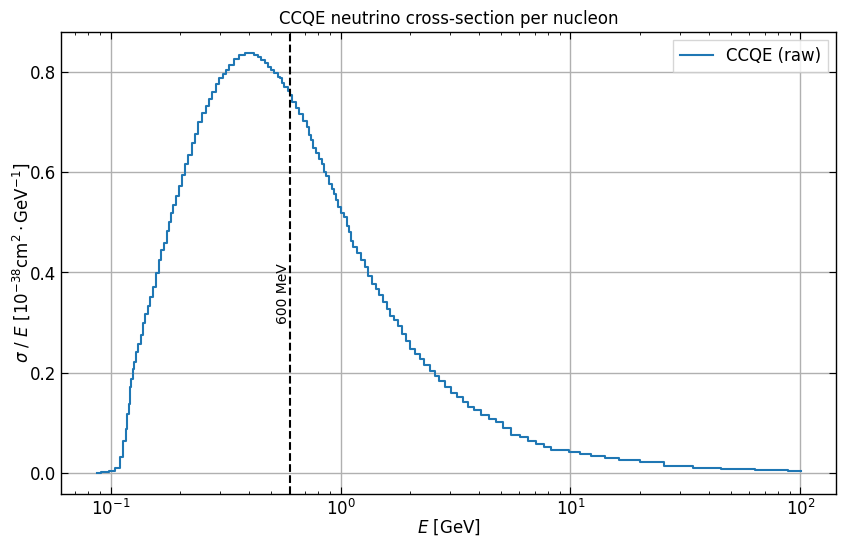

In [39]:
plt.step(ccqe.energy, ccqe.xsec, label=r"CCQE (raw)", where="mid")
plt.axvline(x=0.6, linestyle="--", color="black")
ax = plt.gca()
plt.text(
    x=0.6,
    y=0.5,
    s=r"600 MeV",
    ha="right",
    va="top",
    rotation=90,
    transform=ax.get_xaxis_transform(),
)

plt.xscale("log")
# plt.yscale("log")
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$\sigma\ /\ E$ [$10^{-38} \text{cm}^2 \cdot \text{GeV}^{-1}$]")
# plt.ylim(bottom=1e-1)
plt.title(r"CCQE neutrino cross-section per nucleon")
plt.legend()

plt.show()

In [40]:
ccqe_true = conv.xsecimport(name="neutrino_ccqe.csv", mode="true")

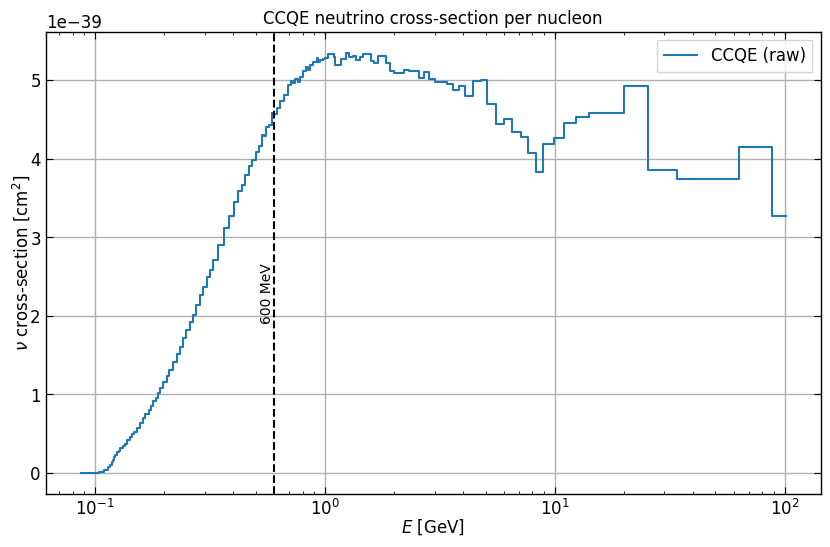

In [41]:
plt.step(ccqe_true.energy, ccqe_true.xsec, label=r"CCQE (raw)", where="mid")
plt.axvline(x=0.6, linestyle="--", color="black")
ax = plt.gca()
plt.text(
    x=0.6,
    y=0.5,
    s=r"600 MeV",
    ha="right",
    va="top",
    rotation=90,
    transform=ax.get_xaxis_transform(),
)

plt.xscale("log")
# plt.yscale("log")
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$\nu$ cross-section [$\text{cm}^2$]")
# plt.ylim(bottom=1e-1)
plt.title(r"CCQE neutrino cross-section per nucleon")
plt.legend()

plt.show()

<p> </p>
The data is not very smooth, since it has been read-out from a figure in an article. We can use the Savitzky-Golay filter to smooth it a little.

In [42]:
ccqe_filtered = conv.xsecimport(name="neutrino_ccqe.csv", mode="true filter")

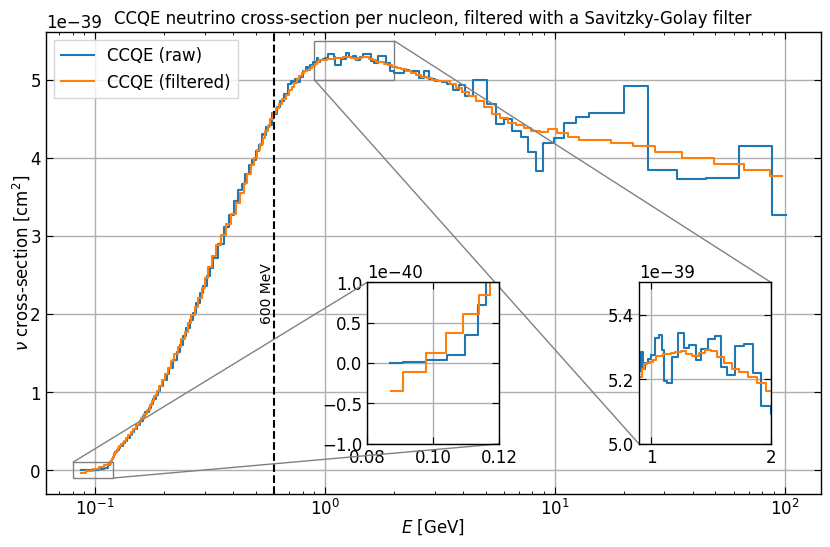

In [43]:
plt.step(ccqe_true.energy, ccqe_true.xsec, label=r"CCQE (raw)", where="mid")
plt.step(
    ccqe_filtered.energy, ccqe_filtered.xsec, label=r"CCQE (filtered)", where="mid"
)
plt.axvline(x=0.6, linestyle="--", color="black")
ax = plt.gca()
plt.text(
    x=0.6,
    y=0.5,
    s=r"600 MeV",
    ha="right",
    va="top",
    rotation=90,
    transform=ax.get_xaxis_transform(),
)

plt.xscale("log")
# plt.yscale("log")
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$\nu$ cross-section [$\text{cm}^2$]")
# plt.ylim(bottom=0)
plt.title(
    r"CCQE neutrino cross-section per nucleon, filtered with a Savitzky-Golay filter"
)
plt.legend()

ax = plt.gca()
for xlim, ylim, loc in [
    ((0.9, 2), (5e-39, 5.5e-39), (4, 1, 3)),
    ((0.08, 0.12), (-0.1e-39, 0.1e-39), (8, 2, 4)),
]:
    axins = inloc.inset_axes(ax, width="17%", height="35%", loc=loc[0], borderpad=3)
    axins.set_xlim(*xlim)
    axins.set_ylim(*ylim)
    plt.step(ccqe_true.energy, ccqe_true.xsec, where="mid")
    plt.step(ccqe_filtered.energy, ccqe_filtered.xsec, where="mid")
    axins.grid(True, "both")
    inloc.mark_inset(ax, axins, loc1=loc[1], loc2=loc[2], fc="none", ec="0.5")

plt.show()

This plot shows a better reconstructed cross-section, but with a mismatch around 0.1 GeV (due to the abrupt beginning of the data). One way to solve this is to fix manually the points back to the ones read on the figure.

In [44]:
ccqe_filtered = conv.xsecimport(
    name="neutrino_ccqe.csv", mode="true filter", keep_left=5
)

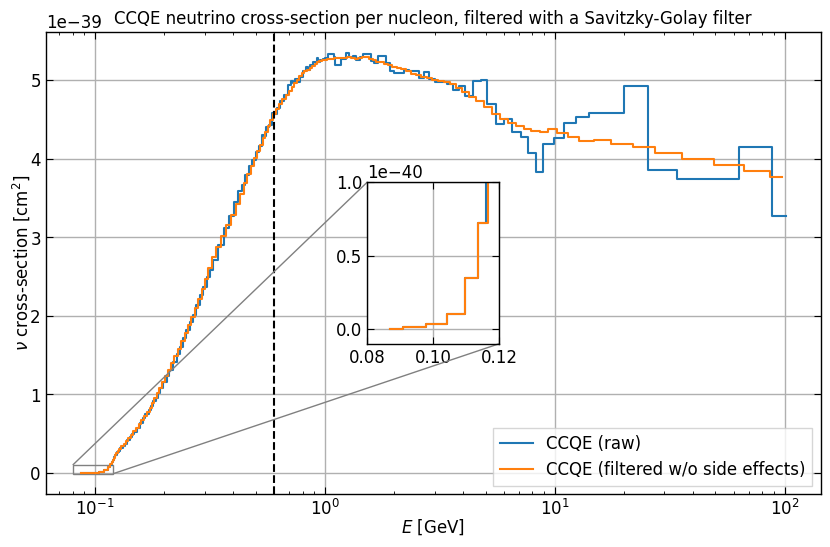

In [45]:
plt.step(ccqe_true.energy, ccqe_true.xsec, label=r"CCQE (raw)", where="mid")
plt.step(
    ccqe_filtered.energy,
    ccqe_filtered.xsec,
    label=r"CCQE (filtered w/o side effects)",
    where="mid",
)
plt.axvline(x=0.6, linestyle="--", color="black")
plt.annotate(r"600 MeV", xy=(0.65, 2e-38), fontsize=10, rotation=90)

plt.xscale("log")
# plt.yscale("log")
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$\nu$ cross-section [$\text{cm}^2$]")
# plt.ylim(bottom=0)
plt.title(
    r"CCQE neutrino cross-section per nucleon, filtered with a Savitzky-Golay filter"
)
plt.legend()

ax = plt.gca()
for xlim, ylim, loc in [
    # ((0.9, 2), (5e-39, 5.5e-39), (5, 1, 3)),
    ((0.08, 0.12), (-0.01e-39, 0.1e-39), (10, 2, 4))
]:
    axins = inloc.inset_axes(ax, width="17%", height="35%", loc=loc[0], borderpad=3)
    axins.set_xlim(*xlim)
    axins.set_ylim(*ylim)
    plt.step(ccqe_true.energy, ccqe_true.xsec, where="mid")
    plt.step(ccqe_filtered.energy, ccqe_filtered.xsec, where="mid")
    axins.grid(True, "both")
    inloc.mark_inset(ax, axins, loc1=loc[1], loc2=loc[2], fc="none", ec="0.5")

plt.show()

From now on, we use the flags (+f) for filtered data, (-s) for removing side effects.

<p> </p>

_________________________________________
## Interpolation

<p> </p>
We'll keep the filtered way in the further analysis, without any other checks, since the reading technique used for the unfiltered data is not precise in itself.

In order to convolve interaction cross-section with the flux, one needs the same bining for the two histograms (the $\texttt{numpy}$ function $\texttt{convolve}$ takes two one-dimensionnal arrays). The way to do so is to interpolate the $(x,y)$ data of one of the two quantities with the $(x)$ of the other. Since :
<ul>
  <li>the flux is the "input" data of the FD (cross-section is more of a filter, a detector response);</li>
  <li>the flux binning is smaller;</li>
  <li>the flux data is "cleaner" (collected from T2K collab.) than the cross-section (read from a figure);</li>
</ul> 
we choose to to interpolate the cross-section data to fit the flux binning.

In [46]:
ccqe_interp = conv.xsecimport(
    name="neutrino_ccqe.csv",
    mode="true filter interp",
    keep_left=5,
    on=(t2kflux_2020_plus250kA_nominal_sk.minE + t2kflux_2020_plus250kA_nominal_sk.maxE)
    / 2,
)

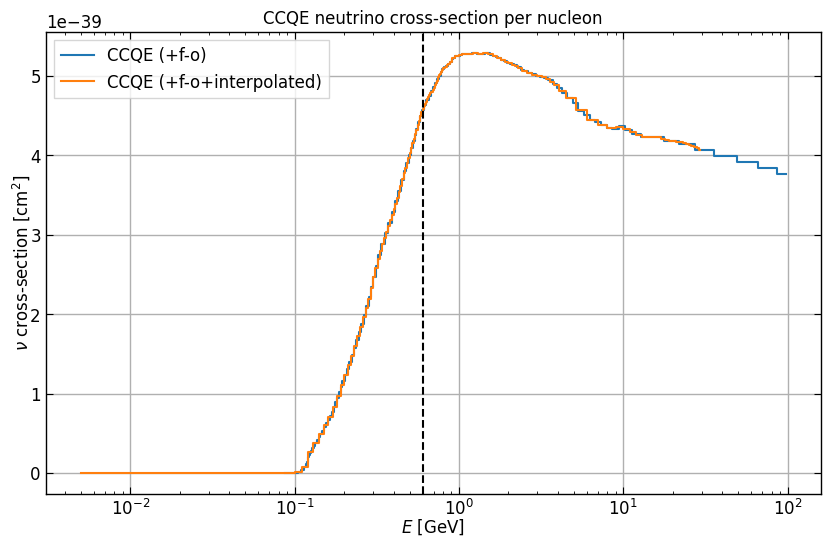

In [47]:
plt.step(ccqe_filtered.energy, ccqe_filtered.xsec, label=r"CCQE (+f-o)", where="mid")
plt.step(
    ccqe_interp.energy,
    ccqe_interp.xsec,
    label=r"CCQE (+f-o+interpolated)",
    where="mid",
)
plt.axvline(x=0.6, linestyle="--", color="black")
plt.annotate(r"600 MeV", xy=(0.65, 2e-38), fontsize=10, rotation=90)

plt.xscale("log")
# plt.yscale("log")
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$\nu$ cross-section [$\text{cm}^2$]")
# plt.ylim(bottom=1e-1)
plt.title(r"CCQE neutrino cross-section per nucleon")
plt.legend()

plt.show()

We hereafter use the flag (+i) for interpolated data.

___________________________________________________________________

## Multiplying flux and cross-section

In [48]:
number = pd.DataFrame()
for key in ["minE", "maxE"]:
    number[key] = t2kflux_2020_plus250kA_nominal_sk[key]
for key in ["numu", "antinumu", "nue", "antinue"]:
    number[key] = (
        ccqe_interp.xsec * t2kflux_2020_plus250kA_nominal_sk[key] / (50 * 1e21)
    )

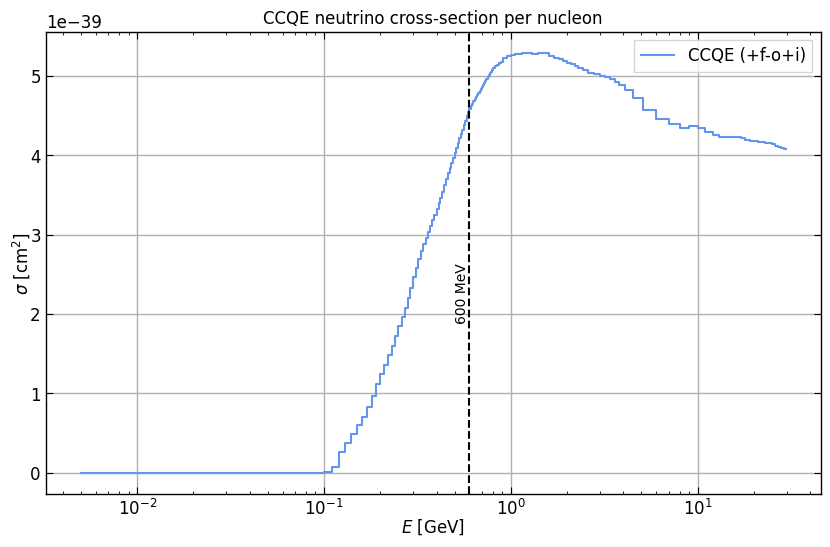

In [49]:
plt.step(
    ccqe_interp.energy,
    ccqe_interp.xsec,
    label=r"CCQE (+f-o+i)",
    where="mid",
    color="cornflowerblue",
)
plt.axvline(x=0.6, linestyle="--", color="black")
ax = plt.gca()
plt.text(
    x=0.6,
    y=0.5,
    s=r"600 MeV",
    ha="right",
    va="top",
    rotation=90,
    transform=ax.get_xaxis_transform(),
)

plt.xscale("log")
# plt.yscale("log")
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$\sigma$ [$\text{cm}^2$]")
# plt.ylim(bottom=1e-1)
plt.title(r"CCQE neutrino cross-section per nucleon")
plt.legend()

plt.show()

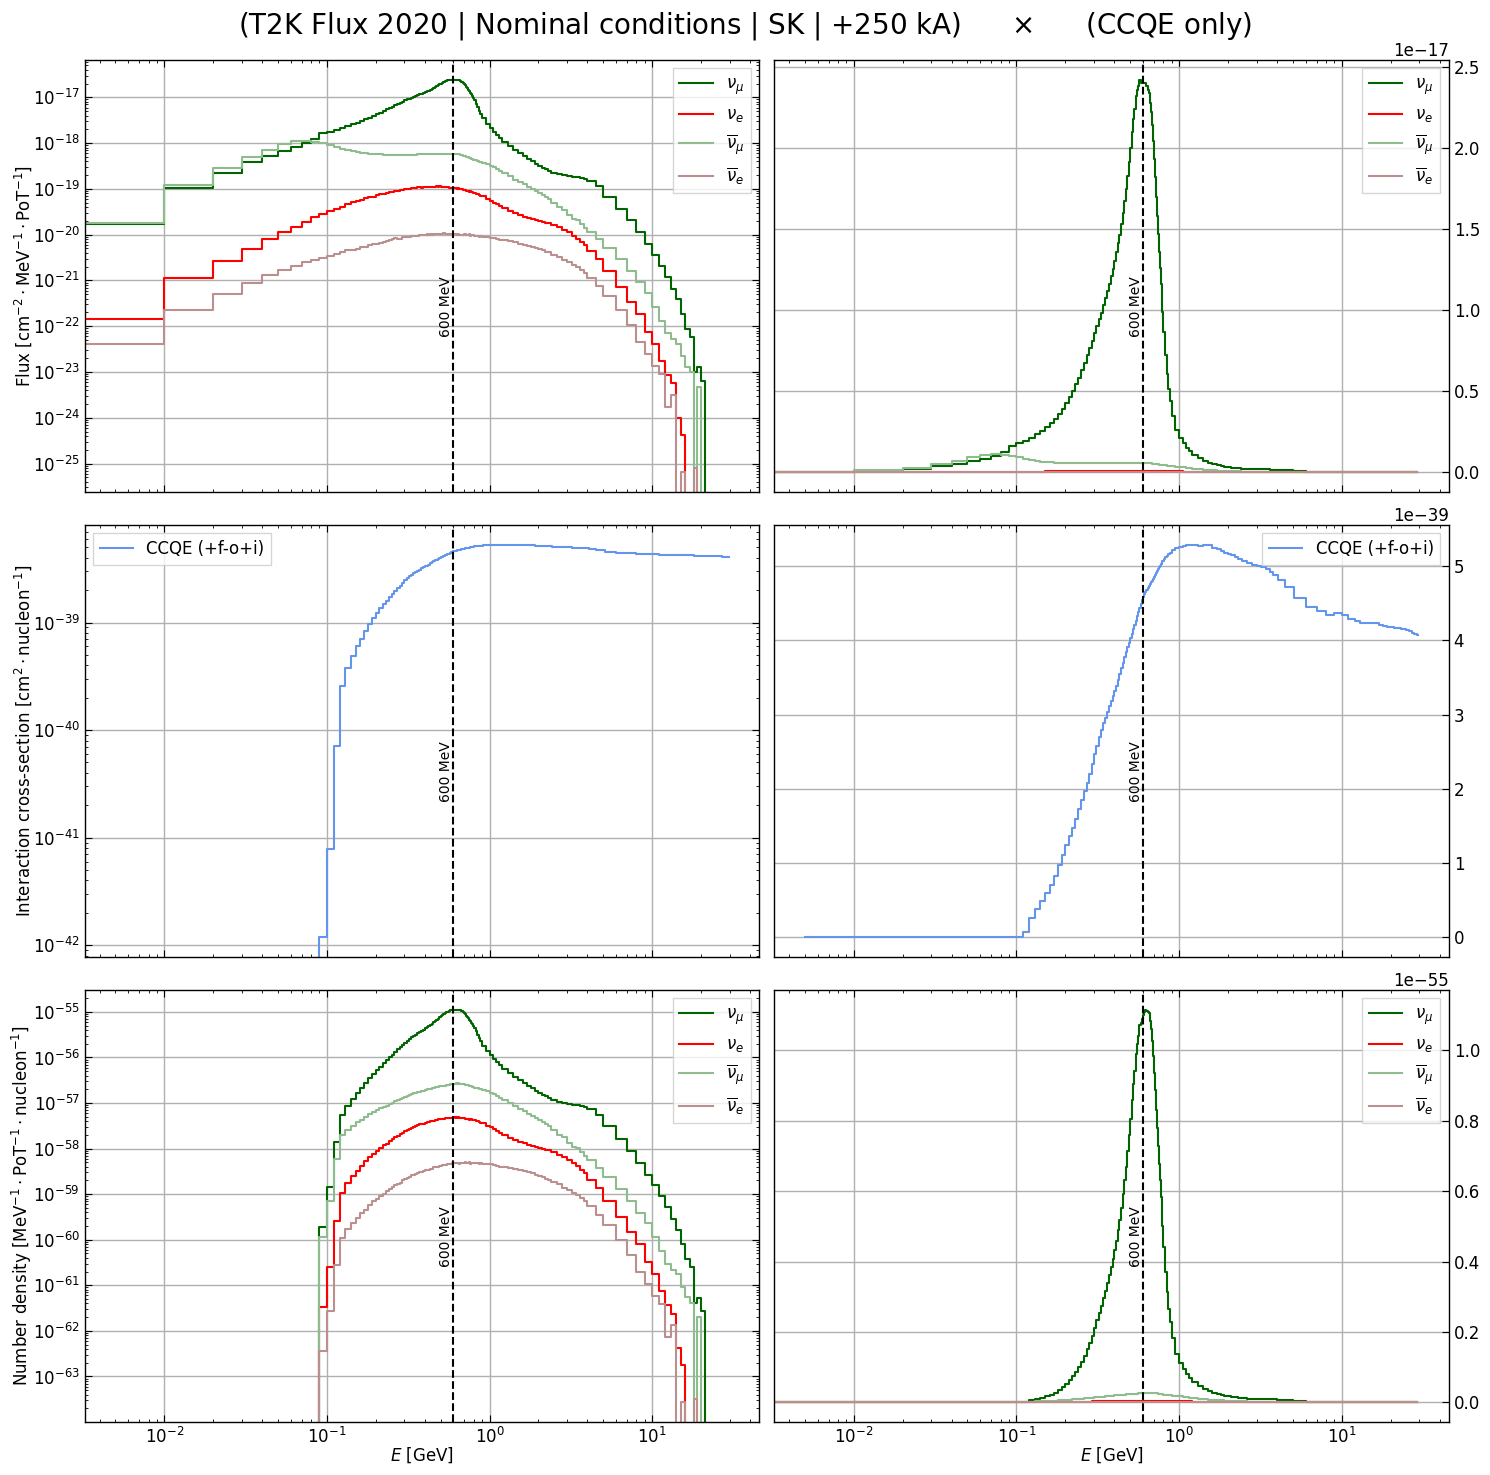

In [50]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15), sharex="col")  # , sharey='row')

for i in [0, 1]:
    axs[1, i].step(
        ccqe_interp.energy,
        ccqe_interp.xsec,
        label=r"CCQE (+f-o+i)",
        where="mid",
        color="cornflowerblue",
    )

    for key in ["numu", "nue", "antinumu", "antinue"]:
        axs[0, i].step(
            t2kflux_2020_plus250kA_nominal_sk.minE,
            t2kflux_2020_plus250kA_nominal_sk[key] / (50 * 1e21),
            label=conv.print_dict[key],
            color=colors[key],
            where="post",
        )

        axs[2, i].step(
            number.minE,
            number[key],
            label=conv.print_dict[key],
            color=colors[key],
            where="post",
        )

    axs[2, i].set_xlabel(r"$E$ [GeV]")

for ax in axs.reshape(-1):
    ax.set_xscale("log")
    ax.legend()
    ax.text(
        x=0.6,
        y=0.5,
        s=r"600 MeV",
        ha="right",
        va="top",
        rotation=90,
        transform=ax.get_xaxis_transform(),
    )
    ax.axvline(x=0.6, linestyle="--", color="black")

for i in range(3):
    axs[i, 0].set_yscale("log")
    # axs[i,0].set_ylim(bottom=1e-1)
    axs[i, 1].yaxis.tick_right()

axs[0, 0].set_ylabel(
    r"Flux [$\text{cm}^{-2}\cdot \text{MeV}^{-1} \cdot \text{PoT}^{-1}$]"
)
axs[1, 0].set_ylabel(
    r"Interaction cross-section [$\text{cm}^2 \cdot \text{nucleon}^{-1}$]"
)
axs[2, 0].set_ylabel(
    r"Number density [$\text{MeV}^{-1} \cdot \text{PoT}^{-1} \cdot \text{nucleon}^{-1}$]"
)

fig.suptitle(
    r"(T2K Flux 2020 | Nominal conditions | SK | $+250$ kA) $\ \ \ \ \times \ \ \ \ $ (CCQE only)",
    fontsize=20,
)
fig.tight_layout()

# plt.ylabel(r"Detected $\nu$ number density [$(\text{MeV} \cdot \text{PoT})^{-1}$]")
# plt.ylim(bottom=1e-1)

plt.show()

In [51]:
number["total"] = number.numu + number.nue + number.antinumu + number.antinue

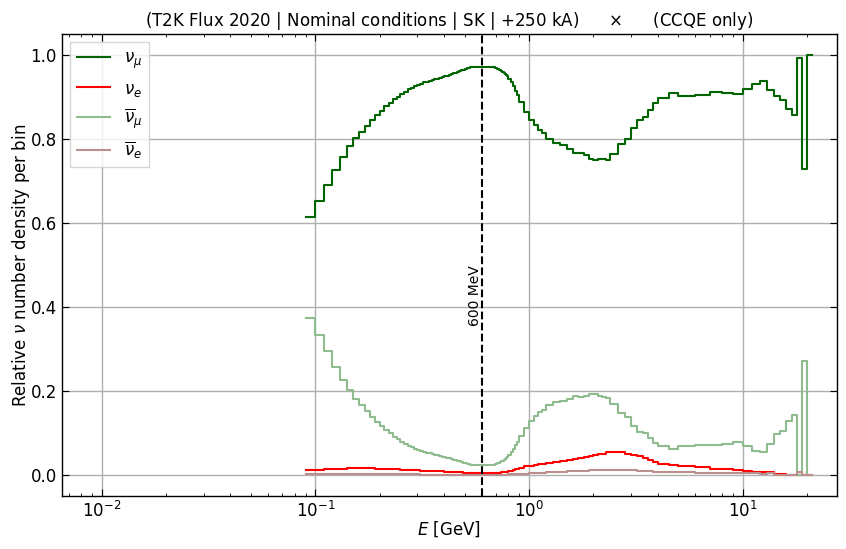

In [52]:
for key in ["numu", "nue", "antinumu", "antinue"]:
    plt.step(
        number.minE,
        number[key] / number.total,
        label=conv.print_dict[key],
        color=colors[key],
        where="post",
    )

ax = plt.gca()
ax.text(
    x=0.6,
    y=0.5,
    s=r"600 MeV",
    ha="right",
    va="top",
    rotation=90,
    transform=ax.get_xaxis_transform(),
)
ax.axvline(x=0.6, linestyle="--", color="black")

plt.xscale("log")
# plt.yscale('log')
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"Relative $\nu$ number density per bin")
# plt.ylim(bottom=1e-4)
plt.title(
    r"(T2K Flux 2020 | Nominal conditions | SK | $+250$ kA) $\ \ \ \ \times \ \ \ \ $ (CCQE only)"
)
plt.legend()
plt.xlim([6.5e-3, None])

plt.show()

In [53]:
numu_total = ((number.maxE - number.minE) * 1e3 * number.numu).sum()
numu_total

5.0573998299744505e-53

<p> </p>

_________________________
## Ocillation probability

For a given bin of neutrino number density, for the sake of this study, we take as to compute the number density after oscillation, the mean energy of the bin. The correct way to do would be to have a Monte Carlo, taking a random value of energy inside the bin, with the probability given by the number density of the bin.

The values taken to evaluate the expected number of events are those taken in the T2K 2021 analysis.

In [54]:
number_oscillated = pd.DataFrame()
for key in ["minE", "maxE"]:
    number_oscillated[key] = number[key]

for key in ["numu", "nue", "antinumu", "antinue", "nutau", "antinutau"]:
    number_oscillated[key] = 0.0

number["nutau"] = 0.0
number["antinutau"] = 0.0

In [55]:
for i in range(len(number_oscillated)):
    Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = osc.probability_general(
        E=(number_oscillated.maxE.loc[i] + number_oscillated.minE.loc[i]) / 2,
        theta_12=np.arcsin(np.sqrt(0.304)),
        theta_13=np.arcsin(np.sqrt(0.0212)),
        theta_23=np.arcsin(np.sqrt(0.528)),
        delta_cp=-1.601,
        dm2_21=7.53e-5,
        dm2_atm=2.509e-3,
        compute_matrix_multiplication=True,
        L=param.BASELINE * param.CONV_KM_TO_INV_EV,
        ME=True,
        MO="NO",
    )
    number_oscillated.loc[i, "numu"] = (
        number.loc[i, "numu"] * Pmm + number.loc[i, "nue"] * Pem
    )
    number_oscillated.loc[i, "nue"] = (
        number.loc[i, "nue"] * Pee + number.loc[i, "numu"] * Pme
    )
    number_oscillated.loc[i, "nutau"] = (
        number.loc[i, "nue"] * Pet + number.loc[i, "numu"] * Pmt
    )

    Pee, Pem, Pet, Pme, Pmm, Pmt, Pte, Ptm, Ptt = osc.probability_general_anti(
        E=(number_oscillated.maxE.loc[i] + number_oscillated.minE.loc[i]) / 2,
        theta_12=np.arcsin(np.sqrt(0.304)),
        theta_13=np.arcsin(np.sqrt(0.0212)),
        theta_23=np.arcsin(np.sqrt(0.528)),
        delta_cp=-1.601,
        dm2_21=7.53e-5,
        dm2_atm=2.509e-3,
        compute_matrix_multiplication=True,
        L=param.BASELINE * param.CONV_KM_TO_INV_EV,
        ME=True,
        MO="NO",
    )
    number_oscillated.loc[i, "antinumu"] = (
        number.loc[i, "antinumu"] * Pmm + number.loc[i, "antinue"] * Pem
    )
    number_oscillated.loc[i, "antinue"] = (
        number.loc[i, "antinue"] * Pee + number.loc[i, "antinumu"] * Pme
    )
    number_oscillated.loc[i, "antinutau"] = (
        number.loc[i, "antinue"] * Pet + number.loc[i, "antinumu"] * Pmt
    )

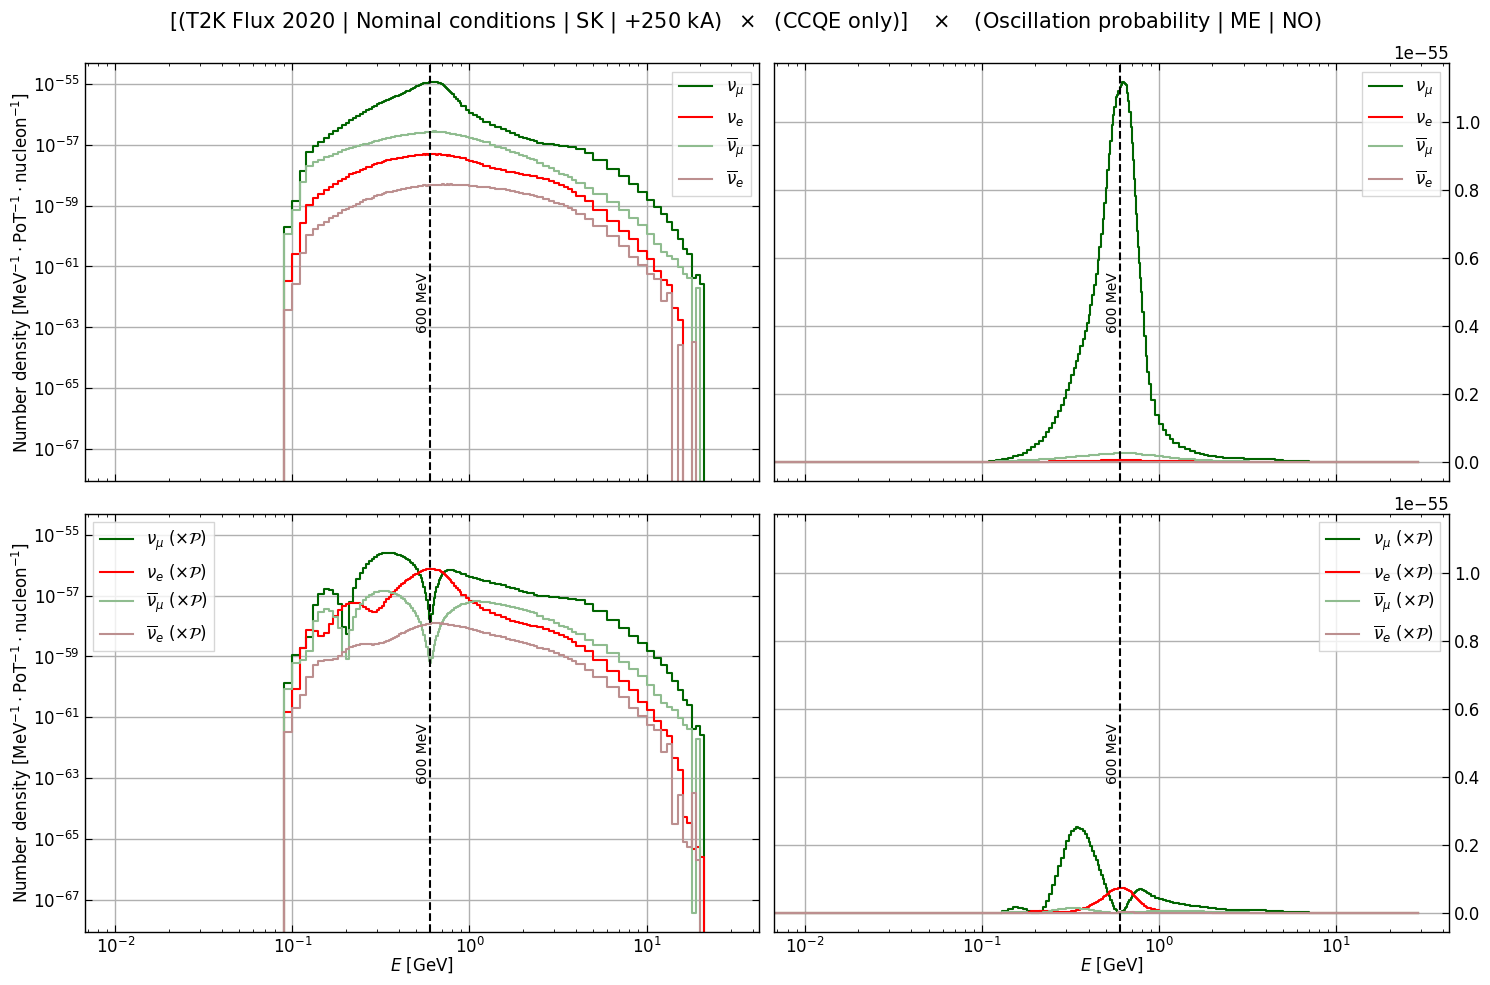

In [56]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex="col", sharey="col")

for i in [0, 1]:
    for key in [
        "numu",
        "nue",
        "antinumu",
        "antinue",
    ]:  # "nutau", "antinutau"]:
        axs[0, i].step(
            number.minE,
            number[key],
            label=conv.print_dict[key],
            color=colors[key],
            where="post",
        )

        axs[1, i].step(
            number_oscillated.minE,
            number_oscillated[key],
            label=conv.print_dict[key] + r" ($\times \mathcal{P}$)",
            color=colors[key],
            where="post",
        )

    axs[1, i].set_xlabel(r"$E$ [GeV]")

for ax in axs.reshape(-1):
    ax.set_xscale("log")
    ax.legend()
    ax.text(
        x=0.6,
        y=0.5,
        s=r"600 MeV",
        ha="right",
        va="top",
        rotation=90,
        transform=ax.get_xaxis_transform(),
    )
    ax.axvline(x=0.6, linestyle="--", color="black")

for i in range(2):
    axs[i, 0].set_yscale("log")
    # axs[i,0].set_ylim(bottom=1e-1)
    axs[i, 1].yaxis.tick_right()

axs[0, 0].set_ylabel(
    r"Number density [$\text{MeV}^{-1} \cdot \text{PoT}^{-1} \cdot \text{nucleon}^{-1}$]"
)
axs[1, 0].set_ylabel(
    r"Number density [$\text{MeV}^{-1} \cdot \text{PoT}^{-1} \cdot \text{nucleon}^{-1}$]"
)

fig.suptitle(
    r"[(T2K Flux 2020 | Nominal conditions | SK | $+250$ kA) $\ \times \ $ (CCQE only)] $\ \ \times \ \ $ (Oscillation probability | ME | NO)",
    fontsize=15,
)
fig.tight_layout()

# plt.ylabel(r"Detected $\nu$ number density [$(\text{MeV} \cdot \text{PoT})^{-1}$]")
# plt.ylim(bottom=1e-1)

plt.show()

In [57]:
numu_total = (
    (number_oscillated.maxE - number_oscillated.minE) * 1e3 * number_oscillated.numu
).sum()
numu_total

1.2444827386444819e-53

<p> </p>

___________________________________

## Energy resolution

In [58]:
ccqe_energy_res = conv.energyimport(name="ccqe_energy_res.csv")
ccqe_energy_res.head()

,relatenergy,events
0,-0.410787,61.704803
1,-0.389075,64.866568
2,-0.372016,93.322456
3,-0.356701,146.479635
4,-0.337897,243.506307


In [59]:
ccqe_energy_res.describe()

,relatenergy,events
count,102.000000,102.000000
mean,0.145821,5895.130705
std,0.312366,6107.207602
min,-0.410787,61.704803
25%,-0.071505,809.462295
50%,0.090130,3745.477546
75%,0.369376,9220.847076
max,0.794223,23327.645051


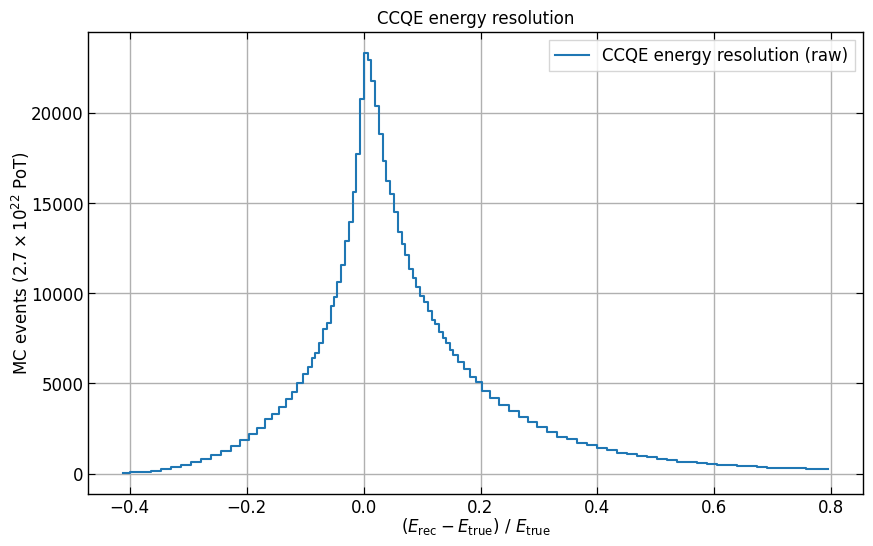

In [60]:
plt.step(
    ccqe_energy_res.relatenergy,
    ccqe_energy_res.events,
    label=r"CCQE energy resolution (raw)",
    where="mid",
)

# plt.xscale("log")
# plt.yscale("log")
plt.xlabel(r"$(E_\text{rec} - E_\text{true})\ /\ E_\text{true}$")
plt.ylabel(r"MC events ($2.7 \times 10^{22}$ PoT)")
# plt.ylim(bottom=1e-1)
plt.title(r"CCQE energy resolution")
plt.legend()

plt.show()

The plot is truncated, so let's add some points on the left and on the right so that the energy difference is 0 at -0.5 and 0 at 1.0, then let's interpolate the curve.

In [66]:
ccqe_energy_res_interp = conv.energyimport(
    name="ccqe_energy_res.csv", mode="interp", on=np.linspace(-0.5, 1.0, 125)
)

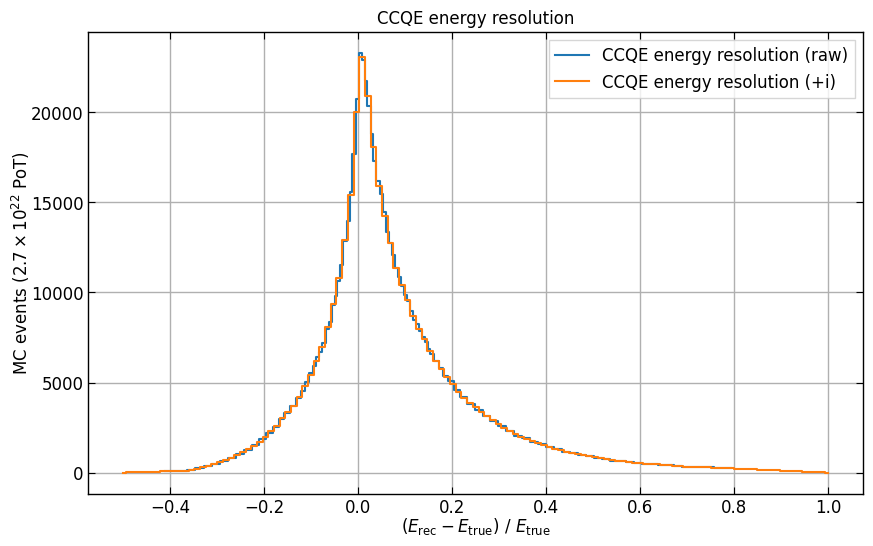

In [67]:
plt.step(
    ccqe_energy_res.relatenergy,
    ccqe_energy_res.events,
    label=r"CCQE energy resolution (raw)",
    where="mid",
)
plt.step(
    ccqe_energy_res_interp.relatenergy,
    ccqe_energy_res_interp.events,
    label=r"CCQE energy resolution (+i)",
    where="mid",
)

# plt.xscale("log")
# plt.yscale("log")
plt.xlabel(r"$(E_\text{rec} - E_\text{true})\ /\ E_\text{true}$")
plt.ylabel(r"MC events ($2.7 \times 10^{22}$ PoT)")
# plt.ylim(bottom=1e-1)
plt.title(r"CCQE energy resolution")
plt.legend()

plt.show()

<p> </p>

Before the convolution, let's normalize the curve so that its integral is 1.

In [68]:
integral = 0
for i in range(len(ccqe_energy_res_interp) - 1):
    integral += ccqe_energy_res_interp.events.loc[i] * (
        ccqe_energy_res_interp.relatenergy.loc[i + 1]
        - ccqe_energy_res_interp.relatenergy.loc[i]
    )
ccqe_energy_res_interp.events = ccqe_energy_res_interp.events / integral

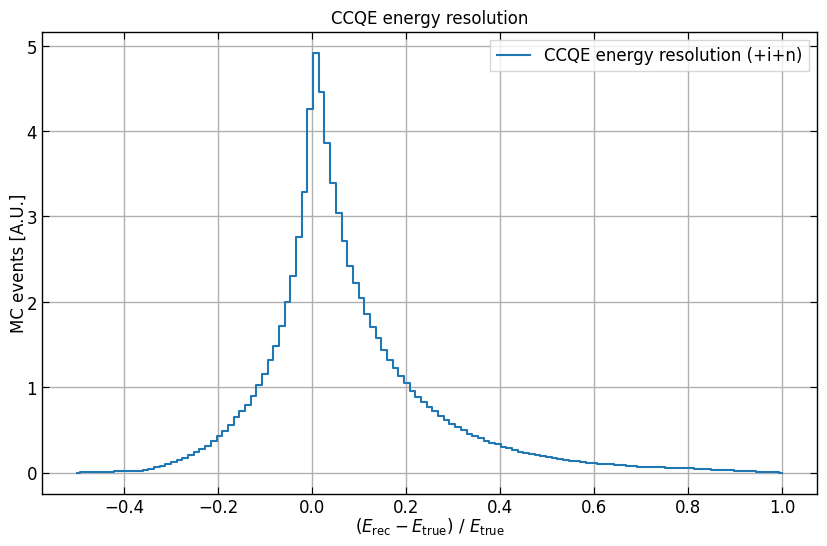

In [69]:
plt.step(
    ccqe_energy_res_interp.relatenergy,
    ccqe_energy_res_interp.events,
    label=r"CCQE energy resolution (+i+n)",
    where="mid",
)

# plt.xscale("log")
# plt.yscale("log")
plt.xlabel(r"$(E_\text{rec} - E_\text{true})\ /\ E_\text{true}$")
plt.ylabel(r"MC events [A.U.]")
# plt.ylim(bottom=1e-1)
plt.title(r"CCQE energy resolution")
plt.legend()

plt.show()

In [70]:
integral = 0
for i in range(len(ccqe_energy_res_interp) - 1):
    integral += ccqe_energy_res_interp.events.loc[i] * (
        ccqe_energy_res_interp.relatenergy.loc[i + 1]
        - ccqe_energy_res_interp.relatenergy.loc[i]
    )
integral

1.0000000000000004

___________________________________________________

## Convoluting the predicted number of neutrinos at SK with the energy resolution

Let's focus on 1 bin of `number`, between `minE` and `maxE`.

In [71]:
number.minE.loc[40], number.maxE.loc[40], (
    number.minE.loc[40] + number.maxE.loc[40]
) / 2
number.numu.loc[40]

4.33077921779162e-56

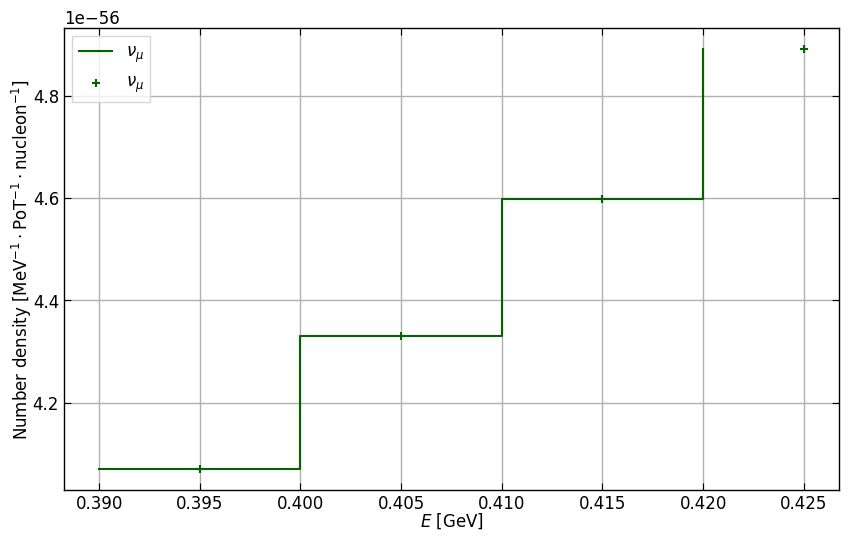

In [72]:
n = 40
plt.step(
    number.minE.loc[n - 1 : n + 2],
    number.numu.loc[n - 1 : n + 2],
    where="post",
    label=conv.print_dict["numu"],
    color=colors["numu"],
)
plt.scatter(
    (number.minE.loc[n - 1 : n + 2] + number.maxE.loc[n - 1 : n + 2]) / 2,
    number.numu.loc[n - 1 : n + 2],
    label=conv.print_dict["numu"],
    color=colors["numu"],
    marker="+",
)
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(
    r"Number density [$\text{MeV}^{-1} \cdot \text{PoT}^{-1} \cdot \text{nucleon}^{-1}$]"
)
plt.legend()
plt.show()

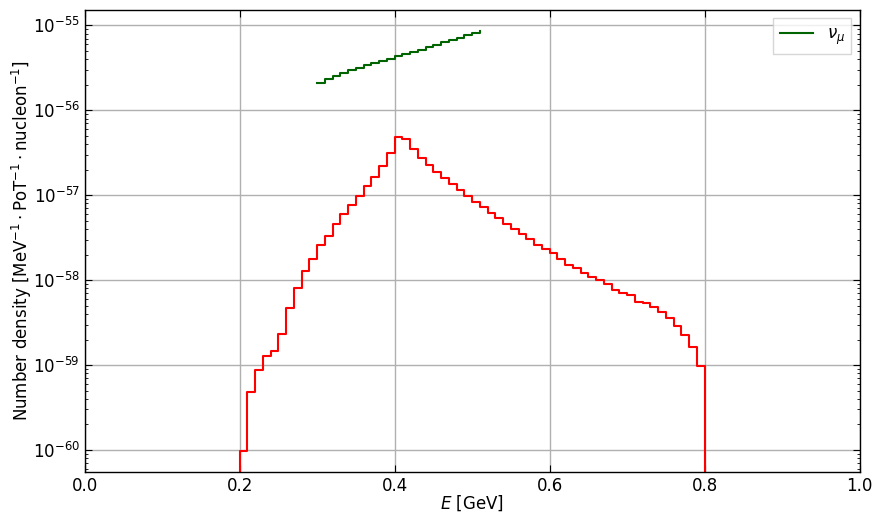

In [73]:
plt.step(
    number.minE.loc[n - 10 : n + 11],
    number.numu.loc[n - 10 : n + 11],
    where="post",
    label=conv.print_dict["numu"],
    color=colors["numu"],
)

reds = ["indianred", "red", "lightcoral"]

for i in [n]:
    Emoy = (number.minE.loc[i] + number.maxE.loc[i]) / 2

    true_energy = ccqe_energy_res_interp.relatenergy * Emoy + Emoy
    true_integral = number.numu.loc[i] * (number.maxE.loc[i] - number.minE.loc[i])

    raw_integral = 0
    for k in range(len(true_energy) - 1):
        raw_integral += ccqe_energy_res_interp.events[k] * (
            true_energy[k + 1] - true_energy[k]
        )
    true_events = ccqe_energy_res_interp.events * true_integral / raw_integral

    interpolated = np.interp(
        x=(number.maxE + number.minE) / 2, xp=true_energy, fp=true_events
    )
    interpolated_integral = (interpolated * (number.maxE - number.minE)).sum()
    interpolated = interpolated * true_integral / interpolated_integral

    plt.step(number.minE, interpolated, where="post", color=reds[i - n + 1])

plt.yscale("log")
# plt.ylim(bottom=2e-56)
plt.xlim(0, 1)
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(
    r"Number density [$\text{MeV}^{-1} \cdot \text{PoT}^{-1}\cdot \text{nucleon}^{-1}$]"
)
plt.legend()
plt.show()

<p> </p>
Then, doing so for each bin and summing every energy smearing :

In [74]:
smeared_number = conv.convolve(input=number, gate=ccqe_energy_res_interp)

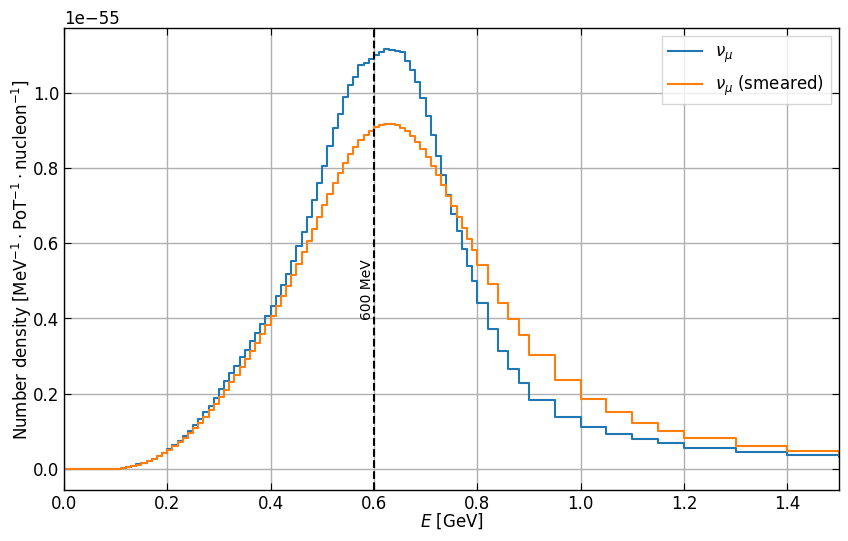

In [75]:
plt.step(number.minE, number.numu, label=r"$\nu_\mu$", where="post")

plt.step(
    smeared_number.minE, smeared_number.numu, label=r"$\nu_\mu$ (smeared)", where="post"
)

ax = plt.gca()
ax.text(
    x=0.6,
    y=0.5,
    s=r"600 MeV",
    ha="right",
    va="top",
    rotation=90,
    transform=ax.get_xaxis_transform(),
)
ax.axvline(x=0.6, linestyle="--", color="black")

# plt.xlim(0, 1)
# plt.yscale('log')
# plt.xscale('log')
plt.xlim([0, 1.5])
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(
    r"Number density [$\text{MeV}^{-1} \cdot \text{PoT}^{-1} \cdot \text{nucleon}^{-1}$]"
)
plt.legend()
plt.show()

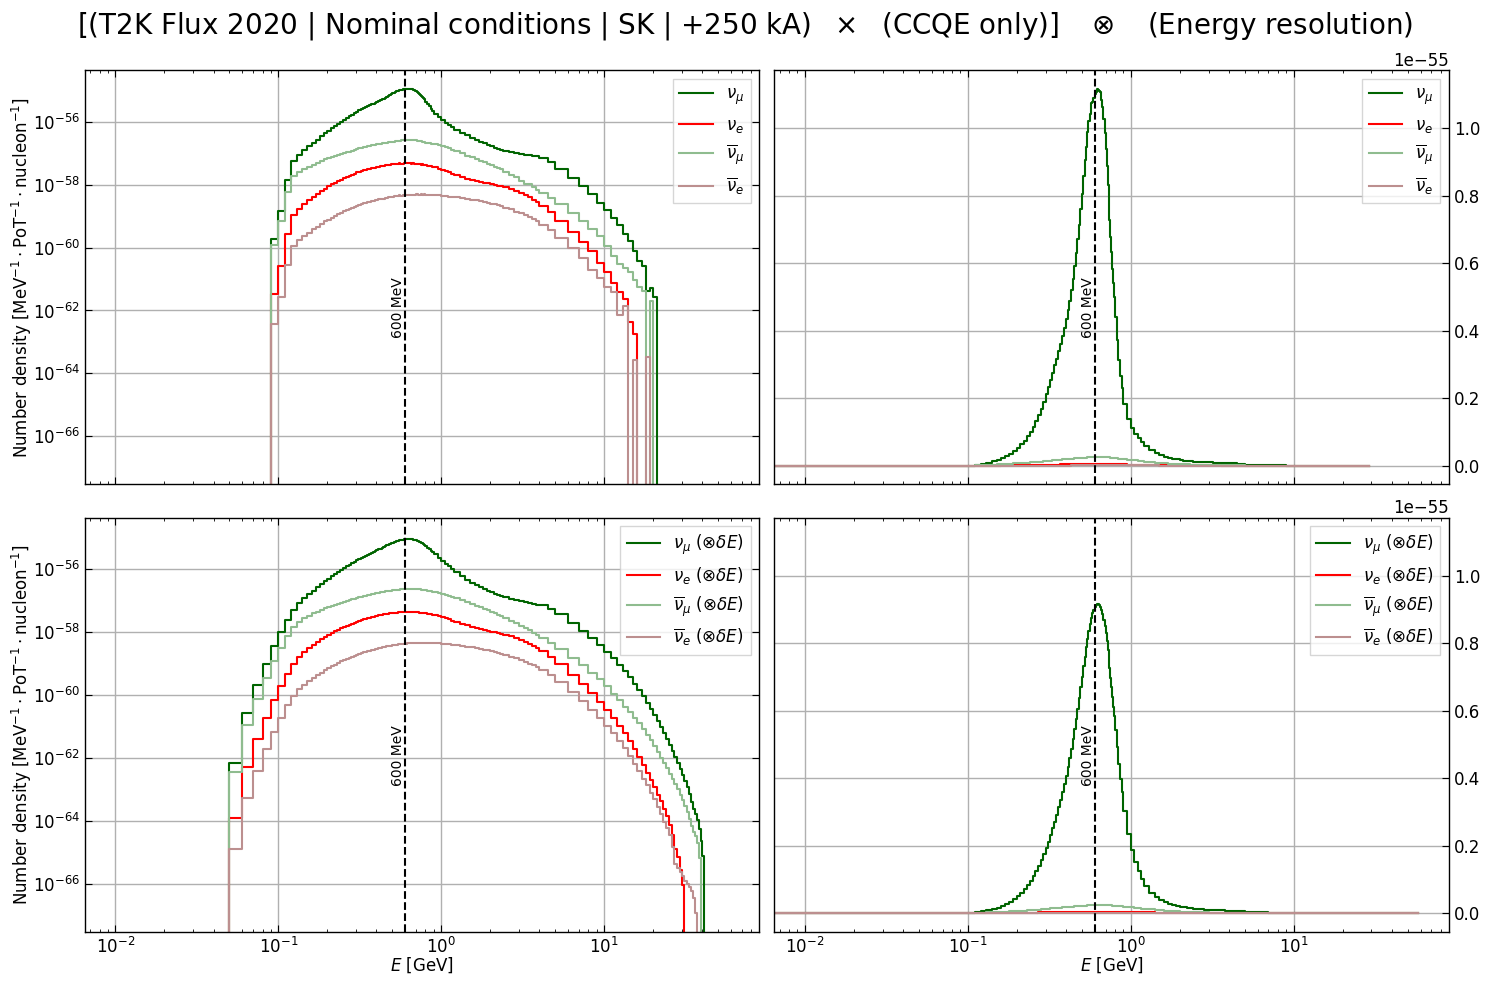

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex="col", sharey="col")

for i in [0, 1]:
    for key in ["numu", "nue", "antinumu", "antinue"]:
        axs[0, i].step(
            number.minE,
            number[key],
            label=conv.print_dict[key],
            color=colors[key],
            where="post",
        )

        axs[1, i].step(
            smeared_number.minE,
            smeared_number[key],
            label=conv.print_dict[key] + r" ($\otimes \delta E$)",
            color=colors[key],
            where="post",
        )

    axs[1, i].set_xlabel(r"$E$ [GeV]")

for ax in axs.reshape(-1):
    ax.set_xscale("log")
    ax.legend()
    ax.text(
        x=0.6,
        y=0.5,
        s=r"600 MeV",
        ha="right",
        va="top",
        rotation=90,
        transform=ax.get_xaxis_transform(),
    )
    ax.axvline(x=0.6, linestyle="--", color="black")

for i in range(2):
    axs[i, 0].set_yscale("log")
    # axs[i,0].set_ylim(bottom=1e-1)
    axs[i, 1].yaxis.tick_right()

axs[0, 0].set_ylabel(
    r"Number density [$\text{MeV}^{-1} \cdot \text{PoT}^{-1} \cdot \text{nucleon}^{-1}$]"
)
axs[1, 0].set_ylabel(
    r"Number density [$\text{MeV}^{-1} \cdot \text{PoT}^{-1} \cdot \text{nucleon}^{-1}$]"
)

fig.suptitle(
    r"[(T2K Flux 2020 | Nominal conditions | SK | $+250$ kA) $\ \times \ $ (CCQE only)] $\ \ \otimes \ \ $ (Energy resolution)",
    fontsize=20,
)
fig.tight_layout()

# plt.ylabel(r"Detected $\nu$ number density [$(\text{MeV} \cdot \text{PoT})^{-1}$]")
# plt.ylim(bottom=1e-1)

plt.show()

________________________________________________________________________
## All together

In [43]:
smeared_oscillated = conv.convolve(input=number_oscillated, gate=ccqe_energy_res_interp)

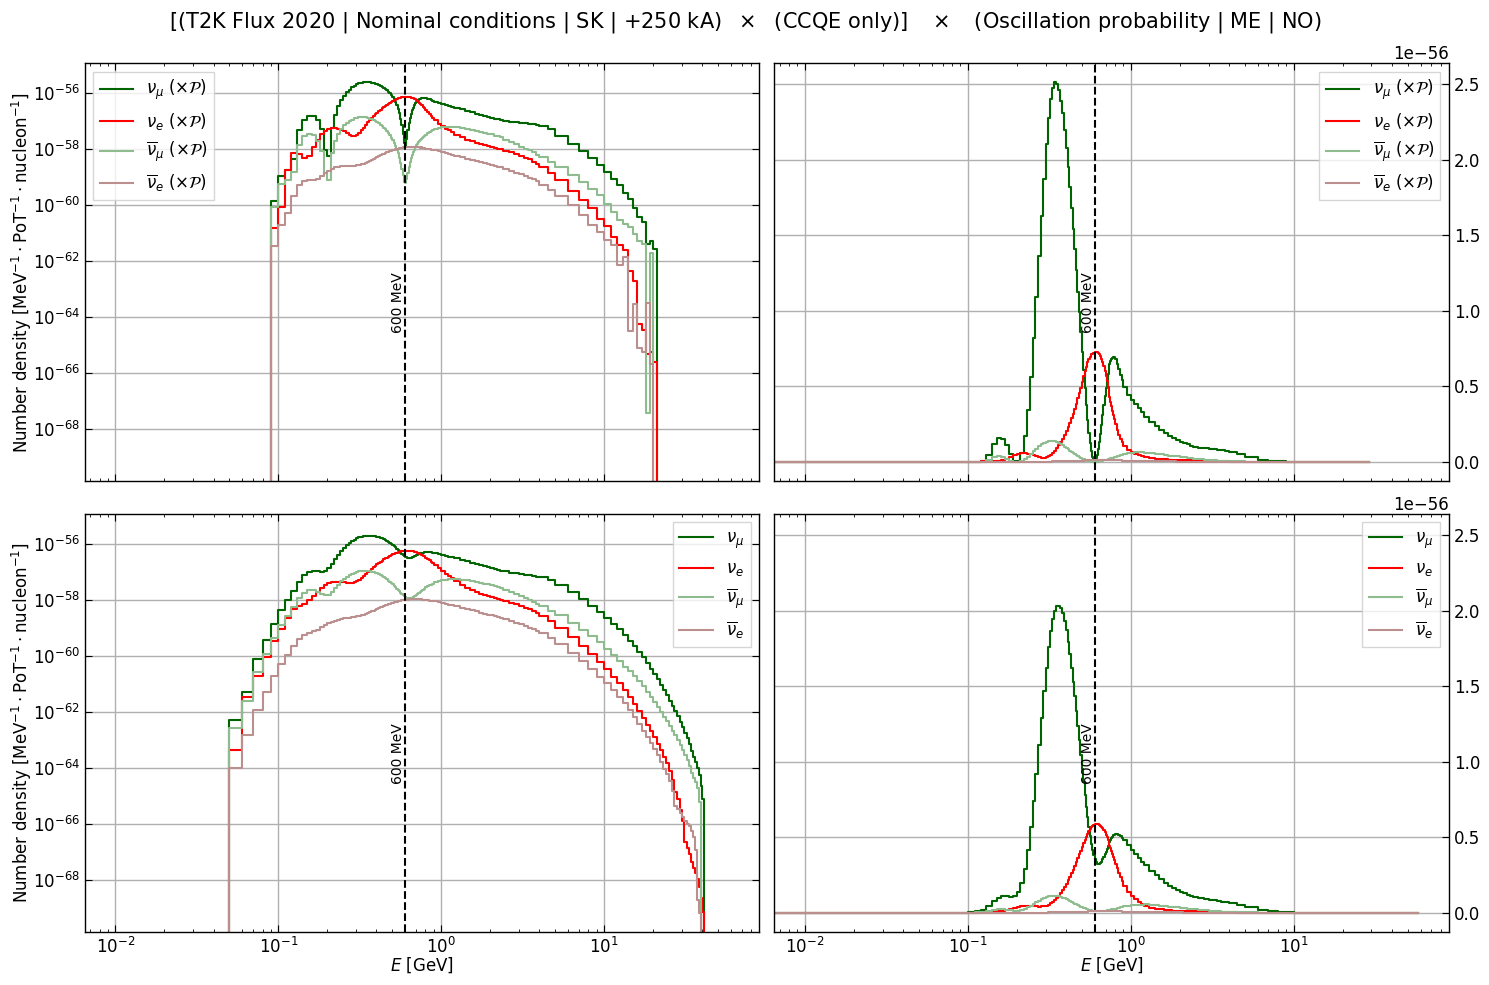

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex="col", sharey="col")

for i in [0, 1]:
    for key in [
        "numu",
        "nue",
        "antinumu",
        "antinue",
    ]:  # "nutau", "antinutau"]:
        axs[0, i].step(
            number_oscillated.minE,
            number_oscillated[key],
            label=conv.print_dict[key] + r" ($\times \mathcal{P}$)",
            color=colors[key],
            where="post",
        )

        axs[1, i].step(
            smeared_oscillated.minE,
            smeared_oscillated[key],
            label=conv.print_dict[key],
            color=colors[key],
            where="post",
        )

    axs[1, i].set_xlabel(r"$E$ [GeV]")

for ax in axs.reshape(-1):
    ax.set_xscale("log")
    ax.legend()
    ax.text(
        x=0.6,
        y=0.5,
        s=r"600 MeV",
        ha="right",
        va="top",
        rotation=90,
        transform=ax.get_xaxis_transform(),
    )
    ax.axvline(x=0.6, linestyle="--", color="black")

for i in range(2):
    axs[i, 0].set_yscale("log")
    # axs[i,0].set_ylim(bottom=1e-1)
    axs[i, 1].yaxis.tick_right()

axs[0, 0].set_ylabel(
    r"Number density [$\text{MeV}^{-1} \cdot \text{PoT}^{-1} \cdot \text{nucleon}^{-1}$]"
)
axs[1, 0].set_ylabel(
    r"Number density [$\text{MeV}^{-1} \cdot \text{PoT}^{-1} \cdot \text{nucleon}^{-1}$]"
)

fig.suptitle(
    r"[(T2K Flux 2020 | Nominal conditions | SK | $+250$ kA) $\ \times \ $ (CCQE only)] $\ \ \times \ \ $ (Oscillation probability | ME | NO)",
    fontsize=15,
)
fig.tight_layout()

# plt.ylabel(r"Detected $\nu$ number density [$(\text{MeV} \cdot \text{PoT})^{-1}$]")
# plt.ylim(bottom=1e-1)

plt.show()

In [45]:
numu_total = (
    (smeared_oscillated.maxE - smeared_oscillated.minE) * 1e3 * smeared_oscillated.numu
).sum()
numu_total

1.2444827386444819e-53

________________________________________________________________________
## Some tests

.. warning::
    The following is not working anymore, due to a mistake in the renormalization of the cross-section. Please skip directly to the next subsection.

The data is not very smooth, since it has been read-out from a figure in an article. The shape of $\sigma / E$ looks like a Maxwell-Boltzmann, so we can try fitting it.

In [46]:
def maxwell(x, a, b):
    return np.sqrt(2 / np.pi) * ((x) ** 2 / a**3) * np.exp(-((x + b) ** 2) / (2 * a**2))

In [47]:
def lognormal(x, sigma, mu):
    return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(
        -((np.log(x) - mu) ** 2) / (2 * sigma**2)
    )

In [48]:
# params = stats.maxwell.fit(xsec.xsec, floc=0)
parameters, covariance = optimize.curve_fit(lognormal, ccqe.energy, ccqe.xsec)

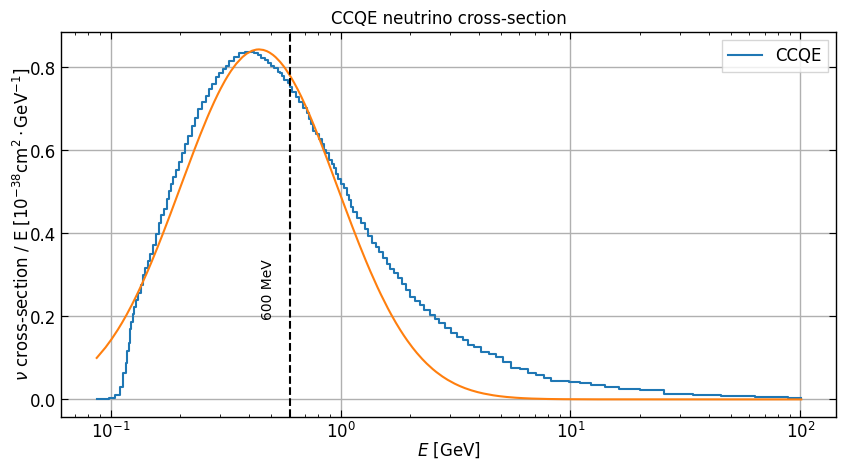

In [49]:
plt.step(ccqe.energy, ccqe.xsec, label=r"CCQE", where="mid")
plt.plot(ccqe.energy, lognormal(ccqe.energy, *parameters))
plt.axvline(x=0.6, linestyle="--", color="black")
plt.annotate(r"600 MeV", xy=(0.45, 2e-1), fontsize=10, rotation=90)

plt.xscale("log")
# plt.yscale("log")
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$\nu$ cross-section / E [$10^{-38} \text{cm}^2 \cdot \text{GeV}^{-1}$]")
# plt.ylim(bottom=1e-1)
plt.title(r"CCQE neutrino cross-section")
plt.legend()

plt.show()

In [50]:
print(*parameters)

0.7868963760037991 -0.19872187106980738
